<a href="https://colab.research.google.com/github/SripriyaValluru/PredictionOfNextCalibrationDate/blob/main/PredictionOfNextCalibDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [7]:
data = ("/training_data.csv")

In [8]:
# Specify the file path
file_path = "/content/training_data.csv"

# Read the CSV file and create a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


    AssetId       EquipmentName LastCalibrationDate LastCalibrationTime  \
0      2001         ECG Machine          15-02-2023            08:30:00   
1      2002  Ultrasound Scanner          20-05-2023            14:45:00   
2      2003       X-ray Machine          10-01-2023            11:00:00   
3      2004       Infusion Pump          05-08-2023            09:15:00   
4      2005          Ventilator          25-03-2023            18:20:00   
..      ...                 ...                 ...                 ...   
75     5006          Microscope          15-09-2023            08:45:00   
76     5007          Desiccator          12-12-2023            13:15:00   
77     5008        Vortex Mixer          02-07-2023            15:00:00   
78     5009   Cryogenic Storage          15-01-2023            10:30:00   
79     5010       Slide Stainer          01-11-2023            14:45:00   

    NumberOfUses NextCalibrationDate  DaysUntilNextCalibration  
0            100          15-04-20

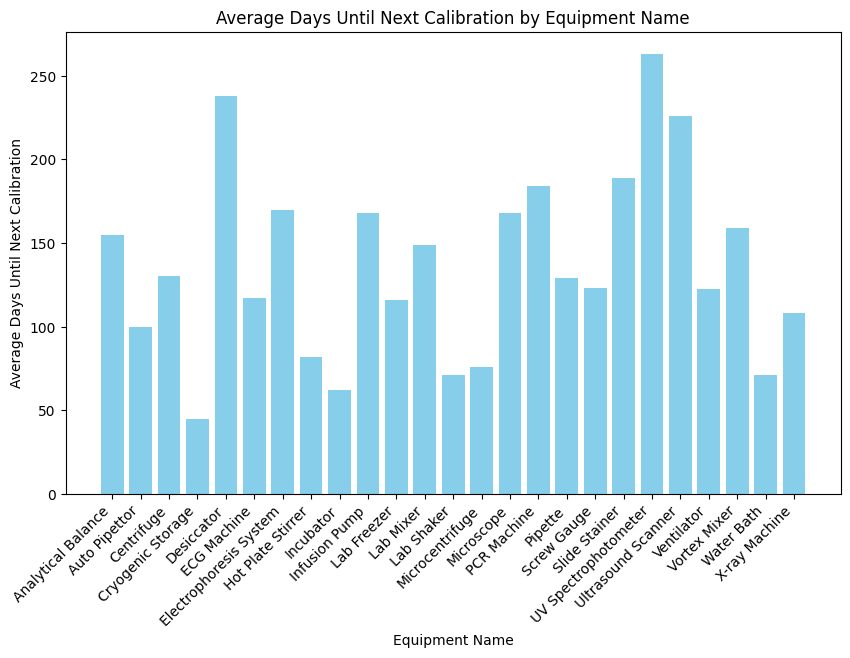

In [9]:
# Calculate average days until next calibration by equipment name
average_days_until_next_calib = df.groupby('EquipmentName')['DaysUntilNextCalibration'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_days_until_next_calib['EquipmentName'], average_days_until_next_calib['DaysUntilNextCalibration'], color='skyblue')
plt.title('Average Days Until Next Calibration by Equipment Name')
plt.xlabel('Equipment Name')
plt.ylabel('Average Days Until Next Calibration')
plt.xticks(rotation=45, ha='right')
plt.show()

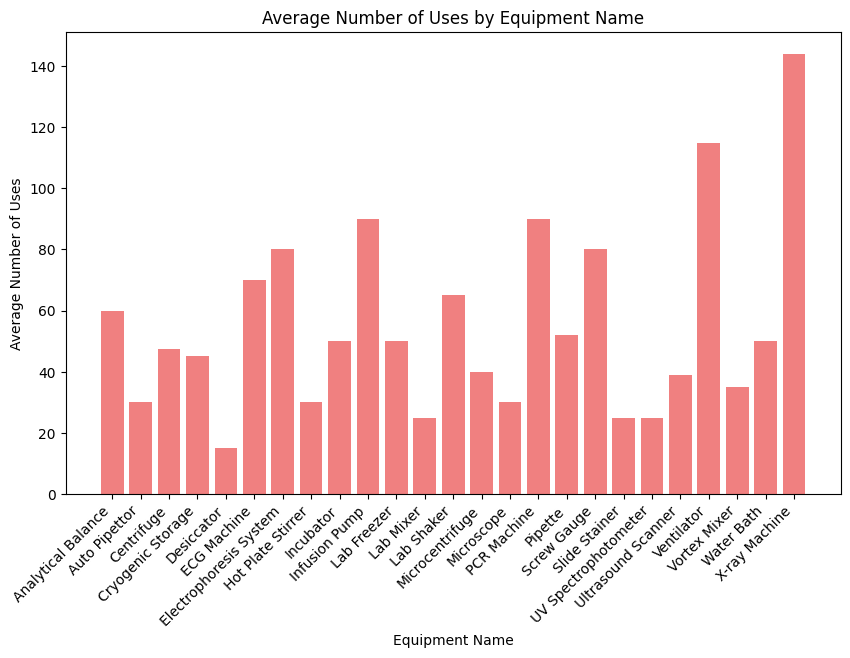

In [10]:
# Calculate average number of uses by equipment name
average_number_of_uses = df.groupby('EquipmentName')['NumberOfUses'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_number_of_uses['EquipmentName'], average_number_of_uses['NumberOfUses'], color='lightcoral')
plt.title('Average Number of Uses by Equipment Name')
plt.xlabel('Equipment Name')
plt.ylabel('Average Number of Uses')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# Convert Last Calibration Date to datetime
df['NextCalibrationDate'] = datetime.now() + pd.to_timedelta(df['DaysUntilNextCalibration'], unit='D')

# Splitting the data into training and testing sets
X = df[['NumberOfUses', 'DaysUntilNextCalibration']]
y = df['NextCalibrationDate']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# Evaluating the model
mse = mean_squared_error(y_test.astype(int), y_pred.astype(int))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28224.0


In [17]:
def predict_next_calibration(equipment_name, number_of_uses, days_until_next_calibration):
    input_data = [[number_of_uses, days_until_next_calibration]]
    prediction = model.predict(input_data)

    # Rounding the predicted value
    rounded_prediction = round(prediction[0])

    # Limiting the prediction to a reasonable range
    rounded_prediction = max(1, min(rounded_prediction, 365))  # Limit to a range of 1 to 365 days

    # Adding the rounded prediction to the current date
    next_calibration_date = datetime.now() + timedelta(days=int(rounded_prediction))

    return next_calibration_date

In [18]:
# Example usage
equipment_name = 'ECG Machine'
number_of_uses = 80
days_until_next_calibration = 150

predicted_next_calibration_date = predict_next_calibration(equipment_name, number_of_uses, days_until_next_calibration)
print(f'Predicted Next Calibration Date: {predicted_next_calibration_date.strftime("%Y-%m-%d")}')

Predicted Next Calibration Date: 2024-12-25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Sample data
data = {
    'AssetId': [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2016, 2017, 2018, 2019],
    'EquipmentName': ['ECG Machine', 'Ultrasound Scanner', 'X-ray Machine', 'Infusion Pump', 'Ventilator',
                       'ECG Machine', 'Ultrasound Scanner', 'X-ray Machine', 'Infusion Pump', 'Ventilator',
                       'ECG Machine', 'Ultrasound Scanner', 'X-ray Machine', 'Infusion Pump'],
    'NumberOfUses': [100, 80, 200, 120, 90, 50, 30, 180, 100, 120, 60, 40, 150, 80],
    'DaysUntilNextCalibration': [74, 145, 58, 114, 148, 204, 234, 66, 172, 45, 225, 288, 84, 246]
}

df = pd.DataFrame(data)

# Convert Last Calibration Date to datetime
df['NextCalibrationDate'] = datetime.now() + pd.to_timedelta(df['DaysUntilNextCalibration'], unit='D')

# Splitting the data into training and testing sets
X = df[['NumberOfUses']]
y_days = df['DaysUntilNextCalibration']
y_date = df['NextCalibrationDate']

X_train, X_test, y_days_train, y_days_test, y_date_train, y_date_test = train_test_split(X, y_days, y_date, test_size=0.2, random_state=42)

# Creating and training the linear regression model for days until next calibration
model_days = LinearRegression()
model_days.fit(X_train, y_days_train)

# Creating and training the linear regression model for next calibration date
model_date = LinearRegression()
model_date.fit(X_train, y_date_train)

# Making predictions on the test set
y_days_pred = model_days.predict(X_test)
y_date_pred = model_date.predict(X_test)

# Evaluating the models
mse_days = mean_squared_error(y_days_test, y_days_pred)
mse_date = mean_squared_error(y_date_test.astype(int), y_date_pred.astype(int))

print(f'Mean Squared Error (Days Until Next Calibration): {mse_days}')
print(f'Mean Squared Error (Next Calibration Date): {mse_date}')

# Function to predict both days until next calibration and next calibration date
def predict_next_calibration(equipment_name, number_of_uses):
    input_data = [[number_of_uses]]

    # Predicting days until next calibration
    predicted_days = model_days.predict(input_data)[0]

    # Predicting next calibration date
    predicted_date = model_date.predict(input_data)[0]

    # Adding the predicted days to the current date
    next_calibration_date = datetime.now() + timedelta(days=int(predicted_days))

    return int(predicted_days), next_calibration_date

# Example usage
equipment_name = 'ECG Machine'
number_of_uses = 80

predicted_days, predicted_next_calibration_date = predict_next_calibration(equipment_name, number_of_uses)
print(f'Predicted Days Until Next Calibration: {predicted_days} days')
print(f'Predicted Next Calibration Date: {predicted_next_calibration_date.strftime("%Y-%m-%d")}')


Mean Squared Error (Days Until Next Calibration): 6311.264345868298
Mean Squared Error (Next Calibration Date): 1.7477363649506762e+18
Predicted Days Until Next Calibration: 181 days
Predicted Next Calibration Date: 2024-06-24


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Calculating R-squared for both models
r2_days = model_days.score(X_test, y_days_test)
r2_date = model_date.score(X_test, y_date_test.astype(int))

print(f'R-squared (Days Until Next Calibration): {r2_days}')
print(f'R-squared (Next Calibration Date): {r2_date}')


R-squared (Days Until Next Calibration): 0.4625458517418136
R-squared (Next Calibration Date): 0.4625458517418145


In [23]:
# Example usage for 5 different inputs
inputs = [
    ('ECG Machine', 80),
    ('Ultrasound Scanner', 120),
    ('X-ray Machine', 150),
    ('Infusion Pump', 40),
    ('Ventilator', 90)
]

for equipment_name, number_of_uses in inputs:
    predicted_days, predicted_next_calibration_date = predict_next_calibration(equipment_name, number_of_uses)
    print(f'Equipment: {equipment_name}, Number of Uses: {number_of_uses}')
    print(f'Predicted Days Until Next Calibration: {predicted_days} days')
    print(f'Predicted Next Calibration Date: {predicted_next_calibration_date.strftime("%Y-%m-%d")}')
    print('\n')

Equipment: ECG Machine, Number of Uses: 80
Predicted Days Until Next Calibration: 181 days
Predicted Next Calibration Date: 2024-06-24


Equipment: Ultrasound Scanner, Number of Uses: 120
Predicted Days Until Next Calibration: 135 days
Predicted Next Calibration Date: 2024-05-09


Equipment: X-ray Machine, Number of Uses: 150
Predicted Days Until Next Calibration: 100 days
Predicted Next Calibration Date: 2024-04-04


Equipment: Infusion Pump, Number of Uses: 40
Predicted Days Until Next Calibration: 227 days
Predicted Next Calibration Date: 2024-08-09


Equipment: Ventilator, Number of Uses: 90
Predicted Days Until Next Calibration: 169 days
Predicted Next Calibration Date: 2024-06-12




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n